# Wine Data로 Linear Regression

In [32]:
import os
import pandas as pd


In [33]:
DATASET_DIR = os.path.join(os.path.dirname(os.getcwd()), 'datasets')

In [34]:
red_file = os.path.join(DATASET_DIR, 'wine/winequality-red.csv')
white_file = os.path.join(DATASET_DIR, 'wine/winequality-white.csv')

In [35]:
wine_red = pd.read_csv(red_file, sep=';')
wine_white = pd.read_csv(white_file, sep=';')

In [36]:
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [31]:
len(wine_red), len(wine_white)

(1599, 4898)

In [38]:
# wine_red
### -----feature설명----- ###
# fixed_acidity - 고정 산도
# volatile acidity - 휘발성 산도
# citric acid - 구연산
# residual sugar - 잔류 설탕
# chlorides - 염화물
# free sulfur dioxide - free 이산화황
# total sulfur dioxide - 총 이산화황
# density - 밀도
# pH - pH
# sulphates - 황산염
# alcohol - 알코올
# 출력 변수 (감각 데이터 기준) :
# quality - 품질 (0에서 10 사이의 점수)

### red wine

In [41]:
wine_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [42]:
wine_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [345]:
red_corr = wine_red.corr()
red_corr[red_corr<1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,NaN,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,NaN,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,NaN,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,NaN,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,NaN,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,NaN,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,NaN,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,NaN,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,NaN,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,NaN,0.093595,0.251397


In [51]:
wine_red.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

## Simple Linear Regreesion

### 0. Split train_test



In [94]:
new_red = wine_red.copy()

In [210]:
# 무작위 추출법
from sklearn.model_selection import train_test_split

train_red, test_red = train_test_split(new_red, test_size=0.2, random_state=42)

In [245]:
# StratifiedShuffleSplit - 층화추출법
from sklearn.model_selection import StratifiedShuffleSplit

# n_splits -> 몇번 자를지?
# test_size -> test ratio
# random_state -> 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(new_red, new_red['quality']):
    strat_train_red = new_red.iloc[train_index]
    strat_test_red = new_red.iloc[test_index]
    
### 또는
from sklearn.model_selection import train_test_split
train_red, test_red = train_test_split(new_red, test_size=0.2, random_state=42, stratify = new_red['quality'])

In [263]:
train_red['quality'].value_counts()/len(train_red)

5    0.426114
6    0.398749
7    0.124316
4    0.032838
8    0.011728
3    0.006255
Name: quality, dtype: float64

In [264]:
new_red['quality'].value_counts()/len(new_red)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

In [265]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [267]:
# linear Regression Model - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# ---------------------------------------------------------------------------------------------
# LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None):
# fit_intercept: <bool>: intercept 계산 여부 (default=True)
# normalize: <bool>: fit_intercept가 True일때만 사용됨. 정규화 (default=False)
# copy_X: X데이터를 덮어씌울지(normalize)
# n_jobs: 최적화 분산작업 (-1은 허용하는 모든 CPU) (default=None=1)
lr_model = LinearRegression()

#### Alchol 과 quality의 Simple Linear Regression

In [268]:
train_red['alcohol'].shape

(1279,)

In [269]:
train_red['alcohol'].values.reshape(1,-1)

array([[10.75,  9.5 , 10.7 , ..., 10.3 , 11.2 , 12.  ]])

In [270]:
len(train_red['quality']), len(train_red['alcohol'])

(1279, 1279)

In [271]:
# 항이 하나여도 2차원 배열로 들어가야함. --> 일반화
# 벡터는 기본적으로 열벡터
X = train_red['alcohol'].values.reshape(-1, 1)
y = train_red['quality']
print(X.shape)
lr_model.fit(X, y)


(1279, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [272]:

# Returns the coefficient of determination R^2 of the prediction.  
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).  
# sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().  
# The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).  
# A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
lr_model.score(X, y)

0.23155091505246325

### model.score

$$R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$$  

**SST: Sum of Square Total로 편차의 제곱합**  

$$SST = \sum_{i=1}^{n}(y_i-\hat{y_i}+\hat{y_i}-\bar{y})^2 = \sum_{i=1}^{n}(y_i-\bar{y})^2 $$  

**SSR: Sum of Square Regression 회귀식과 평균값의 차이**  
$$SSR = \sum(\hat{y}_i-\bar{y})^2$$


**note: 학습데이터에 대한 모델의 신뢰도를 쉽게 파악할 수 있다는 장점**

In [273]:
lr_model.coef_, lr_model.intercept_

(array([0.36513322]), 1.830904986241109)

##### Train Set

In [274]:
lr_model.score(X, y)

0.23155091505246325

In [284]:
from sklearn.metrics import r2_score
train_pred = lr_model.predict(X)
r2_score(y, train_pred) # 같음

0.23155091505246328

In [285]:
from sklearn.metrics import mean_squared_error

train_pred = lr_model.predict(X)
mean_squared_error(train_pred, y)

0.502086542013329

##### Test Set

In [286]:
X_test = test_red['alcohol'].values.reshape(-1, 1)
y_test = test_red['quality']

In [287]:
lr_model.score(X_test, y_test)

0.2070421320468614

In [288]:
test_pred = lr_model.predict(X_test)

In [289]:
from sklearn.metrics import r2_score
r2_score(y_test, test_pred) # 같음

0.2070421320468614

In [290]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, test_pred)

0.5116746492467928

#### 확인

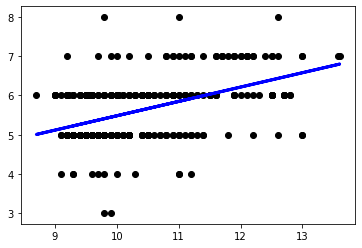

In [291]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, test_pred, color='blue', linewidth=3)
plt.show()

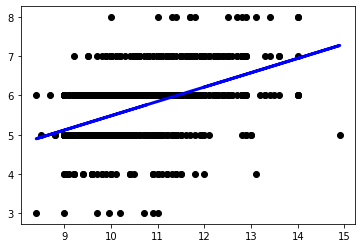

In [292]:
plt.scatter(X, y, color='black')
plt.plot(X, train_pred, color='blue', linewidth=3)
plt.show()

# 실습1. White Wine으로 X=alcohol  , y=Quality Linear Regression

# Multivariate Linear regression 

In [310]:
y = new_red['quality']
X = new_red.drop('quality', axis=1)

In [311]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [312]:
train_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


In [313]:
train_y.head()

493    6
354    6
342    6
834    5
705    5
Name: quality, dtype: int64

### Multivariate

In [314]:
len(train_y)

1279

In [315]:
lr_model = LinearRegression()
lr_model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [322]:
lr_model.coef_

array([ 2.30853339e-02, -1.00130443e+00, -1.40821461e-01,  6.56431104e-03,
       -1.80650315e+00,  5.62733439e-03, -3.64444893e-03, -1.03515936e+01,
       -3.93687732e-01,  8.41171623e-01,  2.81889567e-01])

In [323]:
lr_model.intercept_

14.355105195764924

In [325]:
list(zip(train_X.columns, lr_model.coef_))

[('fixed acidity', 0.023085333909279533),
 ('volatile acidity', -1.001304434067813),
 ('citric acid', -0.14082146122412284),
 ('residual sugar', 0.006564311041479101),
 ('chlorides', -1.8065031490473655),
 ('free sulfur dioxide', 0.005627334387082683),
 ('total sulfur dioxide', -0.003644448933869171),
 ('density', -10.351593588833403),
 ('pH', -0.39368773233985127),
 ('sulphates', 0.841171622609325),
 ('alcohol', 0.2818895674091874)]

##### Train Set

In [316]:
train_predict = lr_model.predict(train_X)
train_predict[:2]

array([5.68864364, 6.05664943])

In [317]:
lr_model.score(train_X, train_y)

0.34799261935298625

In [326]:
mean_squared_error(train_predict, train_y)

0.4241911573139901

##### Test Set

In [327]:
test_predict = lr_model.predict(test_X)
test_predict[:2]

array([5.34666441, 5.05631345])

In [328]:
lr_model.score(test_X, test_y)

0.4031803412796223

In [329]:
mean_squared_error(test_predict, test_y)

0.3900251439639547

# 실습2. White Wine으로 X=모든 Features  , y=Quality Linear Regression

In [ ]:
# 실습1. White Wine으로 X=alcohol  , y=Quality Linear Regression





# 실습3. White와 Red를 합쳐서 실습 X=모든Feature  , y=Quality Linear Regression

# 실습4. White와 Red를 합쳐서 실습 X=모든Feature  , y=pH
